In [9]:
import numpy as np
from tensorflow.keras.datasets import mnist
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
import matplotlib.pyplot as plt


In [2]:
(x_train,y_train), (x_test,y_test) = mnist.load_data()

In [3]:
x_train=x_train/255.0
x_test=x_test/255.0

In [11]:
model= Sequential([Flatten(input_shape=(28,28,1)),
                  Dense(784,activation='relu'),
                  Dense(10,activation='softmax')])

In [16]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [17]:
model.fit(x_train,y_train,epochs=100,batch_size=32,validation_split=0.2)

Epoch 1/100
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2107 - accuracy: 0.9372 - val_loss: 0.1140 - val_accuracy: 0.9643
Epoch 2/100
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0841 - accuracy: 0.9740 - val_loss: 0.0994 - val_accuracy: 0.9692
Epoch 3/100
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0541 - accuracy: 0.9824 - val_loss: 0.0828 - val_accuracy: 0.9747
Epoch 4/100
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0363 - accuracy: 0.9887 - val_loss: 0.0903 - val_accuracy: 0.9752
Epoch 5/100
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0257 - accuracy: 0.9914 - val_loss: 0.0783 - val_accuracy: 0.9766
Epoch 6/100
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0230 - accuracy: 0.9924 - val_loss: 0.0871 - val_accuracy: 0.9774
Epoch 7/100
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0168 - accuracy: 0.9946 - val_loss: 0.0878 - val_ac

1500/1500 [==============================] - 8s 5ms/step - loss: 0.0066 - accuracy: 0.9988 - val_loss: 0.2386 - val_accuracy: 0.9811
Epoch 58/100
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0031 - accuracy: 0.9992 - val_loss: 0.2396 - val_accuracy: 0.9812
Epoch 59/100
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0032 - accuracy: 0.9991 - val_loss: 0.2703 - val_accuracy: 0.9798
Epoch 60/100
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0041 - accuracy: 0.9992 - val_loss: 0.2420 - val_accuracy: 0.9799
Epoch 61/100
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0058 - accuracy: 0.9987 - val_loss: 0.2835 - val_accuracy: 0.9774
Epoch 62/100
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0038 - accuracy: 0.9991 - val_loss: 0.2631 - val_accuracy: 0.9803
Epoch 63/100
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0021 - accuracy: 0.9996 - val_loss: 0.2493 - val_accuracy

In [19]:
loss, accuracy= model.evaluate(x_test,y_test,verbose=2)

print("/nTest Accuracy =  ",accuracy)

313/313 - 1s - loss: 0.3406 - accuracy: 0.9807 - 807ms/epoch - 3ms/step
/nTest Accuracy =   0.9807000160217285


In [20]:
predictions = model.predict(x_test)
predicted_labels=np.argmax(predictions,axis=1)



313/313 [==============================] - 1s 2ms/step


In [25]:
def plot_img(i, predictions_array,true_labels,img):
    predictions_array, true_labels,img=predictions_array[i],true_labels[i],img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img,cmap=plt.cm.binary)
    predicted_labels=np.argmax(predictions_array)
    if predicted_labels==true_labels:
        color='blue'
    else:
        color='red'
    plt.xlabel(f"Predicted: {predicted_labels}{np.max(predictions_array)*100:.2f}%)",color=color)
    
               

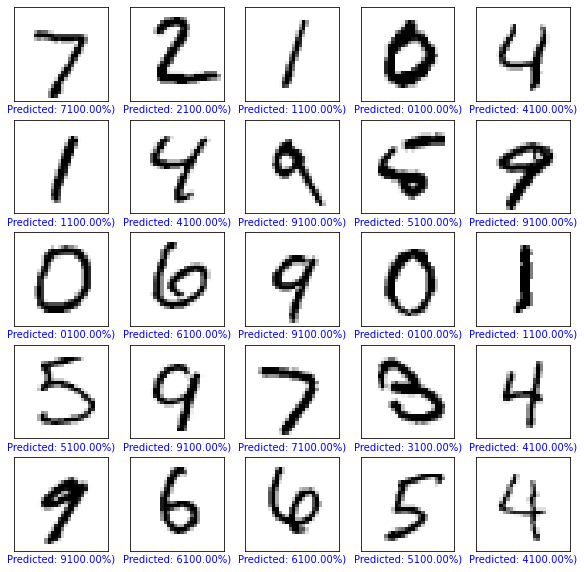

In [26]:
num_row=5
num_cols=5
num_images=num_row*num_cols
plt.figure(figsize=(10,10))
for i in range(num_images):
    plt.subplot(num_row,num_cols,i+1)
    plot_img(i,predictions,y_test,x_test)
plt.show()